In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Legion\Desktop\Python\Datasets\Diabet\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [2]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
import matplotlib.pyplot as plt

num_bins = 6
age_intervals = pd.cut(df['Age'],num_bins)
df['Age_interval'] = age_intervals

first_interval = pd.Interval(left = 21, right = 31,closed = 'right')

In [4]:
df['Age_interval'] = df['Age_interval'].replace([age_intervals.cat.categories[0]],
                                                pd.Interval(left = 21, right = 31,
                                                            closed = 'right'))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_interval
0,2,138,62,35,0,33.6,0.127,47,1,"(41.0, 51.0]"
1,0,84,82,31,125,38.2,0.233,23,0,"(21.0, 31.0]"
2,0,145,0,0,0,44.2,0.630,31,1,"(21.0, 31.0]"
3,0,135,68,42,250,42.3,0.365,24,1,"(21.0, 31.0]"
4,1,139,62,41,480,40.7,0.536,21,0,"(21.0, 31.0]"


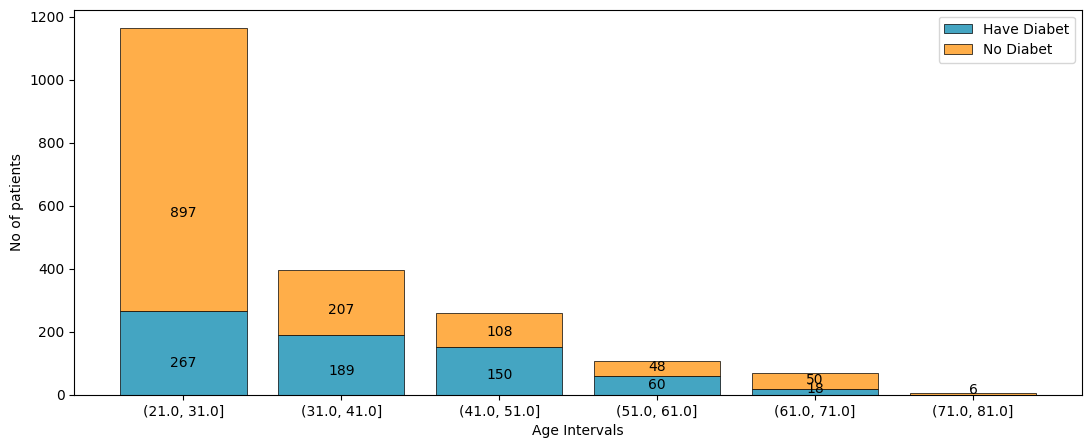

In [5]:
diabet_age_range = df.groupby(by = ['Age_interval','Outcome']).size()
diabet_age_range = dict(diabet_age_range)

intervals = []
have_diabets = list()
no_diabet = []
for key in diabet_age_range:
    age_interval = str(key[0])
    if key[1]:
        have_diabets.append(diabet_age_range[key])
        intervals.append(age_interval)
    else:
        no_diabet.append(diabet_age_range[key])
    
fig,axes = plt.subplots(figsize = (13,5))
    
axes.bar(intervals,have_diabets,
         edgecolor = 'black',linewidth = 0.5,
        color = '#44a5c2',label = 'Have Diabet')
axes.bar(intervals,no_diabet, bottom = have_diabets,
         edgecolor = 'black',linewidth = 0.5,
         color = '#ffae49', label = 'No Diabet')

for bar in axes.patches:
    if bar.get_height():
        axes.text(bar.get_x() + bar.get_width()/2,
                 bar.get_y() + bar.get_height()/3,
                 bar.get_height(),ha = 'center',color = 'black',
                fontsize = 10)

axes.legend()
axes.set_xlabel('Age Intervals')
axes.set_ylabel('No of patients')

plt.show()

In [6]:
import numpy as np
df['Insulin'] = df['Insulin'].replace(0,np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0,np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0,np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_interval
0,2,138,62.0,35.0,NaN,33.6,0.127,47,1,"(41.0, 51.0]"
1,0,84,82.0,31.0,125.0,38.2,0.233,23,0,"(21.0, 31.0]"
2,0,145,NaN,NaN,NaN,44.2,0.630,31,1,"(21.0, 31.0]"
3,0,135,68.0,42.0,250.0,42.3,0.365,24,1,"(21.0, 31.0]"
4,1,139,62.0,41.0,480.0,40.7,0.536,21,0,"(21.0, 31.0]"


In [7]:
df.drop('Age_interval',axis = 'columns',inplace = True)

In [8]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(estimator = BayesianRidge())
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

df['BloodPressure'] = df['BloodPressure'].round(0)
df['Insulin'] = df['Insulin'].round(0)
df['SkinThickness'] = df['SkinThickness'].round(0)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,138.0,62.0,35.0,181.0,33.6,0.127,47.0,1.0
1,0.0,84.0,82.0,31.0,125.0,38.2,0.233,23.0,0.0
2,0.0,145.0,76.0,39.0,215.0,44.2,0.630,31.0,1.0
3,0.0,135.0,68.0,42.0,250.0,42.3,0.365,24.0,1.0
4,1.0,139.0,62.0,41.0,480.0,40.7,0.536,21.0,0.0


<h2>Relations between Age and Blood Pressure and BMI</h2>

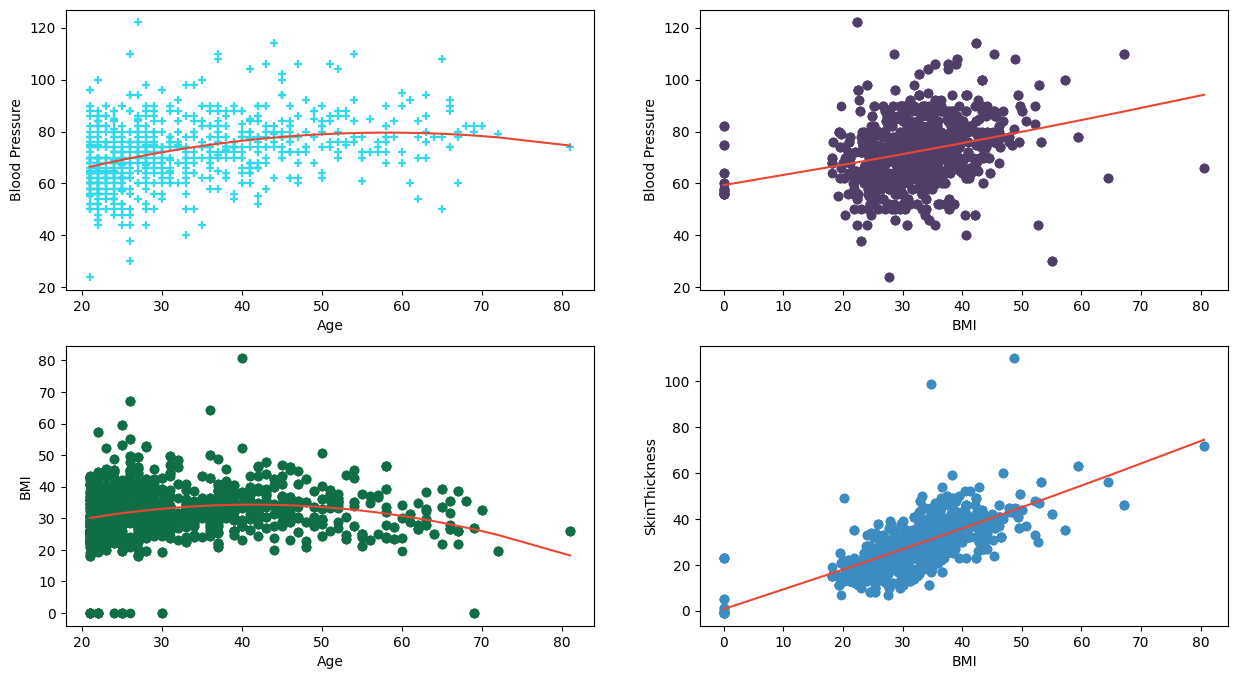

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

fig,axes = plt.subplots(2,2,figsize = (15,8))

def plot_linear(ax,X,y, degree = 2):
    lst = [(X[i],y[i]) for i in range(len(y))]
    lst = sorted(lst,key = lambda x:x[0])
    
    X, y = [num[0] for num in lst], ([num[1] for num in lst])
    X = np.asarray(X).reshape(-1,1)
    lr = LinearRegression()
    poly = PolynomialFeatures(degree = degree)
    
    X_poly = poly.fit_transform(X)
    lr.fit(X_poly,y)
    
    ax.plot(X,lr.predict(X_poly),color = '#eb4634')
    
    return

#First ax
axes[0][0].scatter(x = df['Age'], y = df['BloodPressure'],
                color = '#34d8eb', marker = '+')

plot_linear(axes[0][0], df['Age'], df['BloodPressure'])

axes[0][0].set_xlabel('Age')
axes[0][0].set_ylabel('Blood Pressure')

#second ax
axes[0][1].scatter(x = df['BMI'], y = df['BloodPressure'],color = '#503e69')
plot_linear(axes[0][1], df['BMI'], df['BloodPressure'],degree = 2)

axes[0][1].set_xlabel('BMI')
axes[0][1].set_ylabel('Blood Pressure')

#third ax

axes[1][0].scatter(df['Age'], df['BMI'],color = '#0f6e46')
plot_linear(axes[1][0],X = df['Age'], y = df['BMI'])

axes[1][0].set_xlabel('Age')
axes[1][0].set_ylabel('BMI')

#fourth ax

axes[1][1].scatter(df['BMI'],df['SkinThickness'],color = '#3c8cc2')
plot_linear(axes[1][1],df['BMI'], df['SkinThickness'])

axes[1][1].set_xlabel('BMI')
axes[1][1].set_ylabel('SkinThickness')

plt.show()

As age goes up, the blood pressure increases. Also the persons with higher BMI tend to have higher Skin thickness.

<h2> Does higher Glucose level increases the chances of having diabets?</h2>

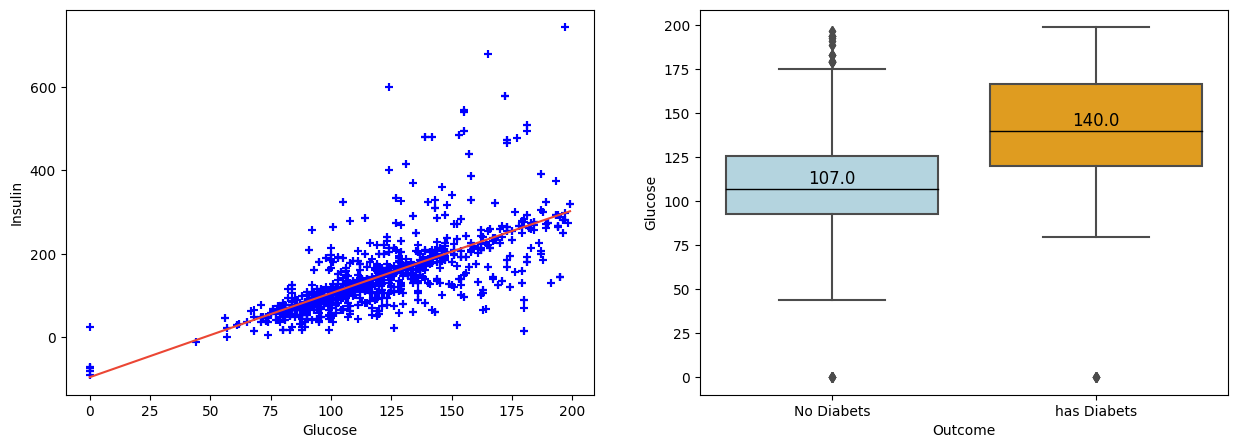

In [10]:
import seaborn as sns

fig, axes = plt.subplots(1,2,figsize = (15,5))

axes[0].scatter(x = df['Glucose'], y = df['Insulin'],
               marker = '+', color = 'blue')
plot_linear(ax = axes[0], X = df['Glucose'], y = df['Insulin'])

axes[0].set_xlabel('Glucose')
axes[0].set_ylabel('Insulin')

colors = ["lightblue", "orange"]
sns.boxplot(data = df, x = df['Outcome'], y = 'Glucose',
                     boxprops=dict(linewidth=1.5),
                      palette = colors,
                     medianprops=dict(color='black', linewidth=1),ax = axes[1])

medians = df.groupby('Outcome')['Glucose'].median().values
pos = range(len(medians))
for tick, label in zip(pos, axes[1].get_xticklabels()):
    axes[1].text(tick,medians[tick] + 3, medians[tick],
                horizontalalignment = 'center',size = 'large',
                 weight = 'light',color = 'black')

axes[1].set_xticklabels(['No Diabets','has Diabets'])

plt.show()

We can obsereve that the higher the <i>Glucose</i> is, the higher <i>Insulin</i> is going to be. Also the patients who have Diabets, have higher level of Glucose. So it suggest there is a strong connection with having diabets and the level of Glucose and Insulin.

<h2>Heatmap</h2>

<AxesSubplot:>

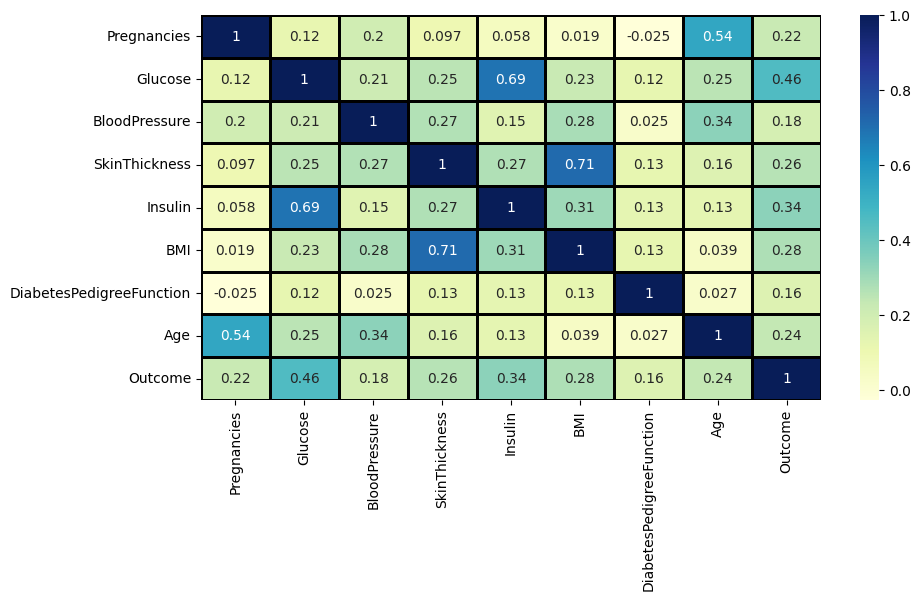

In [11]:
fig = plt.figure(figsize = (10,5))

sns.heatmap(df.corr(), annot = True,
            linewidth = 1, linecolor = 'black',
           cmap = 'YlGnBu')

<h2>Split dataset into train and test parts</h2>

In [12]:
from sklearn.model_selection import train_test_split
X, y = df.drop('Outcome', axis = 'columns'), df['Outcome']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .25, random_state = 25, shuffle = True)

<h2>Train machine learning models</h2>

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

models = [LogisticRegression(max_iter = 1000),DecisionTreeClassifier(),RandomForestClassifier(),
         SVC(),GaussianNB(),KNeighborsClassifier(),GradientBoostingClassifier(),
         MLPClassifier(),AdaBoostClassifier(),ExtraTreesClassifier(),XGBClassifier()]

train_scores = {}
test_scores = dict()
from sklearn.model_selection import cross_val_score,KFold
from statistics import mean
cross_val_scores = []

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

kfolds = KFold(n_splits = 5)
for model in models:
    name = type(model).__name__
    model.fit(xtrain,ytrain)
    
    train_scores[name] = round(model.score(xtrain,ytrain),2)
    test_scores[name] = round(model.score(xtest,ytest),2)
    
    scores_kfold = cross_val_score(model,X,y,cv = kfolds)
    scores_kfold = mean(scores_kfold)
    cross_val_scores.append(round(scores_kfold,2))
    

In [18]:
score_df = {"Train scores":[value for value in train_scores.values()],
            'Test scores':test_scores.values(),
           'Cross Validation':cross_val_scores}

score_df = pd.DataFrame(score_df,index = [type(model).__name__ for model in models])
score_df

,Train scores,Test scores,Cross Validation
LogisticRegression,0.76,0.78,0.77
DecisionTreeClassifier,1.00,0.95,0.99
RandomForestClassifier,1.00,0.94,0.99
SVC,0.76,0.77,0.77
GaussianNB,0.75,0.77,0.76
KNeighborsClassifier,0.90,0.77,0.81
GradientBoostingClassifier,0.93,0.88,0.89
MLPClassifier,0.78,0.79,0.75
AdaBoostClassifier,0.81,0.81,0.80
ExtraTreesClassifier,1.00,0.95,0.99


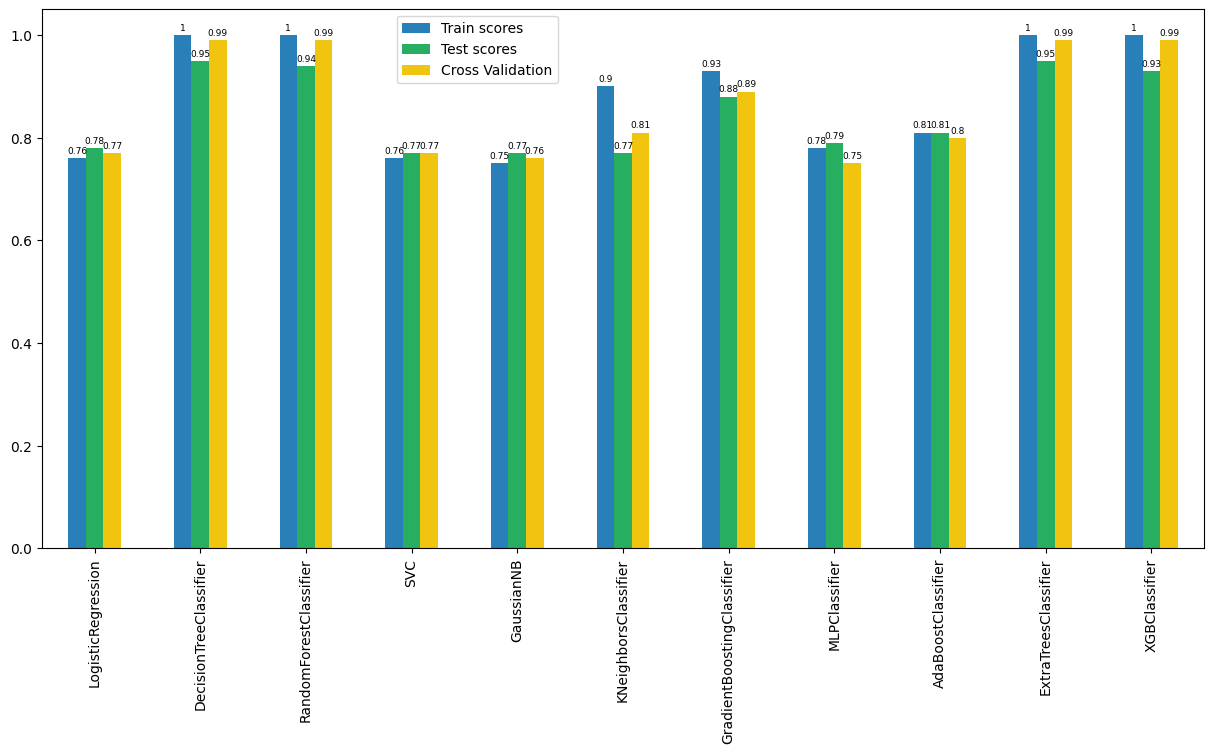

In [19]:
ax = score_df.plot(kind = 'bar',figsize = (15,7),
                   color = ['#2980b9', '#27ae60', '#f1c40f'])

ax.legend(bbox_to_anchor = (0,0,0.45,1))
for value in ax.containers:
    ax.bar_label(value,label_type = 'edge',fontsize = 6.5,padding = 2)

plt.show()